In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
import re
import nltk
import math
import os
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [2]:
from imblearn.over_sampling import SMOTE

In [3]:
# follow the link below for a very useful tutorial on SMOTE
# https://medium.com/@saeedAR/smote-and-near-miss-in-python-machine-learning-in-imbalanced-datasets-b7976d9a7a79

In [4]:
## data from R library 'billboard'

In [5]:
# use index_col=[0] to avoid 'Unnamed: 0' column
df1 = pd.read_csv('songs_wiki.csv',index_col=[0])
df1.head(150)

,no,title,artist,year
1,1,Theme from A Summer Place,Percy Faith,1960
2,2,He'll Have to Go,Jim Reeves,1960
3,3,Cathy's Clown,The Everly Brothers,1960
4,4,Running Bear,Johnny Preston,1960
5,5,Teen Angel,Mark Dinning,1960
6,6,I'm Sorry,Brenda Lee,1960
7,7,It's Now or Never,Elvis Presley,1960
8,8,Handy Man,Jimmy Jones,1960
9,9,Stuck on You,Elvis Presley,1960
10,10,The Twist,Chubby Checker,1960


In [6]:
df1.columns

Index(['no', 'title', 'artist', 'year'], dtype='object')

In [7]:
df1.shape

(5701, 4)

In [8]:
df2 = pd.read_csv('songs_features.csv',index_col=[0])
df2.head(10)

,year,artist_name,artist_id,explicit,track_name,track_id,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
1,1960,Percy Faith & His Orchestra,24DQLSng7bKZD4GXLIaQbv,False,"The Theme From ""A Summer Place"" - Single Version",2kKL5kk4On8YRSKWDgXWMX,0.466,0.389,5,-12.825,...,0.843000,0.2950,0.745,92.631,audio_features,spotify:track:2kKL5kk4On8YRSKWDgXWMX,https://api.spotify.com/v1/tracks/2kKL5kk4On8Y...,https://api.spotify.com/v1/audio-analysis/2kKL...,144893,4
2,1960,Jim Reeves,2Ev0e8GUIX4u7d9etNLTXg,False,He'll Have to Go,7DH5dXVuQaqcKf9oTy9oUN,0.554,0.186,1,-15.846,...,0.001440,0.1100,0.200,81.181,audio_features,spotify:track:7DH5dXVuQaqcKf9oTy9oUN,https://api.spotify.com/v1/tracks/7DH5dXVuQaqc...,https://api.spotify.com/v1/audio-analysis/7DH5...,138640,3
3,1960,Johnny Preston,1B8n8vtEeexQ5NKehHTkeo,False,Running Bear,60DbxCJXFG9ZryHHvUPTXG,0.758,0.462,5,-8.952,...,0.000013,0.1700,0.726,120.004,audio_features,spotify:track:60DbxCJXFG9ZryHHvUPTXG,https://api.spotify.com/v1/tracks/60DbxCJXFG9Z...,https://api.spotify.com/v1/audio-analysis/60Db...,160027,4
4,1960,Mark Dinning,55Rf9Kfqd30nmqaeEDMpic,False,Teen Angel,7GvhZ0F7cMBwpv7QzeGABf,0.583,0.168,0,-12.426,...,0.000000,0.1480,0.353,97.572,audio_features,spotify:track:7GvhZ0F7cMBwpv7QzeGABf,https://api.spotify.com/v1/tracks/7GvhZ0F7cMBw...,https://api.spotify.com/v1/audio-analysis/7Gvh...,157080,4
5,1960,Brenda Lee,4cPHsZM98sKzmV26wlwD2W,False,I'm Sorry - Single Version,5VyBNCSb8VXoSxD281PRod,0.567,0.141,10,-14.803,...,0.004650,0.1170,0.315,103.078,audio_features,spotify:track:5VyBNCSb8VXoSxD281PRod,https://api.spotify.com/v1/tracks/5VyBNCSb8VXo...,https://api.spotify.com/v1/audio-analysis/5VyB...,160067,3
6,1960,Elvis Presley,43ZHCT0cAZBISjO8DG9PnE,False,It's Now Or Never - 2003 Sony Remaster,2u8Lrq2TxwtEmCdr1idFOO,0.635,0.391,4,-14.140,...,0.002470,0.4930,0.713,126.267,audio_features,spotify:track:2u8Lrq2TxwtEmCdr1idFOO,https://api.spotify.com/v1/tracks/2u8Lrq2TxwtE...,https://api.spotify.com/v1/audio-analysis/2u8L...,195733,4
7,1960,Jimmy Jones,7ydcRbgt0yM9etADb1Ackp,False,Handy Man,0X6Nnkf4BL7rr1DRxFhcDz,0.534,0.720,10,-7.679,...,0.000000,0.2580,0.901,74.207,audio_features,spotify:track:0X6Nnkf4BL7rr1DRxFhcDz,https://api.spotify.com/v1/tracks/0X6Nnkf4BL7r...,https://api.spotify.com/v1/audio-analysis/0X6N...,120973,4
8,1960,Elvis Presley,43ZHCT0cAZBISjO8DG9PnE,False,Stuck on You,6RLOZGYi7gTZsxtn1wX2T2,0.664,0.539,7,-11.781,...,0.000691,0.1560,0.946,132.212,audio_features,spotify:track:6RLOZGYi7gTZsxtn1wX2T2,https://api.spotify.com/v1/tracks/6RLOZGYi7gTZ...,https://api.spotify.com/v1/audio-analysis/6RLO...,139293,4
9,1960,Chubby Checker,7qQJQ3YtcGlqaLg5tcypN2,False,The Twist - Re-Recording,0M5EaPIXN3FneJ7exwpYNM,0.524,0.713,4,-12.848,...,0.005800,0.0402,0.975,155.033,audio_features,spotify:track:0M5EaPIXN3FneJ7exwpYNM,https://api.spotify.com/v1/tracks/0M5EaPIXN3Fn...,https://api.spotify.com/v1/audio-analysis/0M5E...,158560,4
10,1960,Connie Francis,3EY5DxGdy7x4GelivOjS2Q,False,Everybody's Somebody's Fool,6jdONXtmF2ZmLyRgZfwDRj,0.587,0.720,1,-5.214,...,0.000015,0.2550,0.806,84.272,audio_features,spotify:track:6jdONXtmF2ZmLyRgZfwDRj,https://api.spotify.com/v1/tracks/6jdONXtmF2Zm...,https://api.spotify.com/v1/audio-analysis/6jdO...,160093,4


In [9]:
df2.shape

(5497, 23)

In [10]:
df2.columns

Index(['year', 'artist_name', 'artist_id', 'explicit', 'track_name',
       'track_id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [11]:
df2.columns = ['year', 'artist', 'artist_id', 'explicit', 'title',
       'track_id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature']

In [12]:
data = pd.merge(df1, df2, on=['artist','title','year'])

In [13]:
data.head()

,no,title,artist,year,artist_id,explicit,track_id,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,2,He'll Have to Go,Jim Reeves,1960,2Ev0e8GUIX4u7d9etNLTXg,False,7DH5dXVuQaqcKf9oTy9oUN,0.554,0.186,1,...,0.001440,0.110,0.200,81.181,audio_features,spotify:track:7DH5dXVuQaqcKf9oTy9oUN,https://api.spotify.com/v1/tracks/7DH5dXVuQaqc...,https://api.spotify.com/v1/audio-analysis/7DH5...,138640,3
1,4,Running Bear,Johnny Preston,1960,1B8n8vtEeexQ5NKehHTkeo,False,60DbxCJXFG9ZryHHvUPTXG,0.758,0.462,5,...,0.000013,0.170,0.726,120.004,audio_features,spotify:track:60DbxCJXFG9ZryHHvUPTXG,https://api.spotify.com/v1/tracks/60DbxCJXFG9Z...,https://api.spotify.com/v1/audio-analysis/60Db...,160027,4
2,5,Teen Angel,Mark Dinning,1960,55Rf9Kfqd30nmqaeEDMpic,False,7GvhZ0F7cMBwpv7QzeGABf,0.583,0.168,0,...,0.000000,0.148,0.353,97.572,audio_features,spotify:track:7GvhZ0F7cMBwpv7QzeGABf,https://api.spotify.com/v1/tracks/7GvhZ0F7cMBw...,https://api.spotify.com/v1/audio-analysis/7Gvh...,157080,4
3,8,Handy Man,Jimmy Jones,1960,7ydcRbgt0yM9etADb1Ackp,False,0X6Nnkf4BL7rr1DRxFhcDz,0.534,0.720,10,...,0.000000,0.258,0.901,74.207,audio_features,spotify:track:0X6Nnkf4BL7rr1DRxFhcDz,https://api.spotify.com/v1/tracks/0X6Nnkf4BL7r...,https://api.spotify.com/v1/audio-analysis/0X6N...,120973,4
4,9,Stuck on You,Elvis Presley,1960,43ZHCT0cAZBISjO8DG9PnE,False,6RLOZGYi7gTZsxtn1wX2T2,0.664,0.539,7,...,0.000691,0.156,0.946,132.212,audio_features,spotify:track:6RLOZGYi7gTZsxtn1wX2T2,https://api.spotify.com/v1/tracks/6RLOZGYi7gTZ...,https://api.spotify.com/v1/audio-analysis/6RLO...,139293,4


In [14]:
data.isnull().sum()

no                  0
title               0
artist              0
year                0
artist_id           0
explicit            0
track_id            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [15]:
data.shape

(2559, 24)

In [16]:
data.columns

Index(['no', 'title', 'artist', 'year', 'artist_id', 'explicit', 'track_id',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [17]:
data.dtypes

no                   object
title                object
artist               object
year                  int64
artist_id            object
explicit               bool
track_id             object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
dtype: object

In [18]:
data.no.values

array(['2', '4', '5', ..., '74', '77', '91'], dtype=object)

In [19]:
my_cols = ['no', 'title', 'artist', 'year', 
          'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
          'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
          'type', 'duration_ms', 'time_signature']

songs = data[my_cols]
songs.head()

,no,title,artist,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
0,2,He'll Have to Go,Jim Reeves,1960,0.554,0.186,1,-15.846,1,0.0379,0.909,0.001440,0.110,0.200,81.181,audio_features,138640,3
1,4,Running Bear,Johnny Preston,1960,0.758,0.462,5,-8.952,0,0.0482,0.790,0.000013,0.170,0.726,120.004,audio_features,160027,4
2,5,Teen Angel,Mark Dinning,1960,0.583,0.168,0,-12.426,1,0.0350,0.869,0.000000,0.148,0.353,97.572,audio_features,157080,4
3,8,Handy Man,Jimmy Jones,1960,0.534,0.720,10,-7.679,1,0.0395,0.649,0.000000,0.258,0.901,74.207,audio_features,120973,4
4,9,Stuck on You,Elvis Presley,1960,0.664,0.539,7,-11.781,1,0.0408,0.811,0.000691,0.156,0.946,132.212,audio_features,139293,4


In [20]:
songs.tail()

,no,title,artist,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
2554,57,Wildest Dreams,Taylor Swift,2015,0.550,0.688,8,-7.416,1,0.0897,0.0692,0.001440,0.1060,0.465,139.997,audio_features,220440,4
2555,61,7/11,Beyoncé,2015,0.747,0.705,9,-5.137,0,0.1260,0.0128,0.000000,0.1260,0.571,136.024,audio_features,213507,4
2556,74,Dear Future Husband,Meghan Trainor,2015,0.655,0.782,1,-4.789,1,0.1850,0.3750,0.000000,0.3170,0.839,79.427,audio_features,184227,4
2557,77,Habits (Stay High),Tove Lo,2015,0.691,0.712,5,-3.421,1,0.0327,0.0557,0.000027,0.0896,0.417,110.007,audio_features,208000,4
2558,91,Heartbeat Song,Kelly Clarkson,2015,0.500,0.791,6,-3.711,1,0.0505,0.0120,0.000000,0.0645,0.465,149.093,audio_features,198693,4


In [21]:
songs.shape

(2559, 18)

In [22]:
# convert column of a DataFrame
# Drop a row by condition, remove 'Tie' from no column
songs = songs[songs.no != 'Tie']
songs['no'] = pd.to_numeric(songs['no'])

In [23]:
songs.dtypes

no                    int64
title                object
artist               object
year                  int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
duration_ms           int64
time_signature        int64
dtype: object

## Get more data

In [24]:
data = pd.read_csv('spotsongs.csv')
data.head()

,song_name,Peak_Position,artist,WeekID,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,type,year
0,#SELFIE,16,The Chainsmokers,2014-03-15,27,183750,0.0136,0.808,0.915,0.000009,0,0.0788,-3.277,1,0.233,127.984,4,0.647,Other,2014
1,#SELFIE,16,The Chainsmokers,2014-05-24,27,183750,0.0136,0.808,0.915,0.000009,0,0.0788,-3.277,1,0.233,127.984,4,0.647,Other,2014
2,#SELFIE,16,The Chainsmokers,2014-05-03,27,183750,0.0136,0.808,0.915,0.000009,0,0.0788,-3.277,1,0.233,127.984,4,0.647,Other,2014
3,#SELFIE,16,The Chainsmokers,2014-03-22,27,183750,0.0136,0.808,0.915,0.000009,0,0.0788,-3.277,1,0.233,127.984,4,0.647,Other,2014
4,#SELFIE,16,The Chainsmokers,2014-03-29,27,183750,0.0136,0.808,0.915,0.000009,0,0.0788,-3.277,1,0.233,127.984,4,0.647,Other,2014


In [25]:
data.columns

Index(['song_name', 'Peak_Position', 'artist', 'WeekID', 'song_popularity',
       'song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence', 'type',
       'year'],
      dtype='object')

In [26]:
songs.columns

Index(['no', 'title', 'artist', 'year', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms',
       'time_signature'],
      dtype='object')

In [27]:
data.columns = ['title', 'no', 'artist', 'WeekID', 'song_popularity',
       'duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'type',
       'year']

In [28]:
data.columns

Index(['title', 'no', 'artist', 'WeekID', 'song_popularity', 'duration_ms',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'type', 'year'],
      dtype='object')

In [29]:
cols2 = ['title', 'no', 'artist',
       'duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'type',
       'year']

In [30]:
songs2 = data[cols2]
songs2.head()

,title,no,artist,duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,valence,type,year
0,#SELFIE,16,The Chainsmokers,183750,0.0136,0.808,0.915,0.000009,0,0.0788,-3.277,1,0.233,127.984,4,0.647,Other,2014
1,#SELFIE,16,The Chainsmokers,183750,0.0136,0.808,0.915,0.000009,0,0.0788,-3.277,1,0.233,127.984,4,0.647,Other,2014
2,#SELFIE,16,The Chainsmokers,183750,0.0136,0.808,0.915,0.000009,0,0.0788,-3.277,1,0.233,127.984,4,0.647,Other,2014
3,#SELFIE,16,The Chainsmokers,183750,0.0136,0.808,0.915,0.000009,0,0.0788,-3.277,1,0.233,127.984,4,0.647,Other,2014
4,#SELFIE,16,The Chainsmokers,183750,0.0136,0.808,0.915,0.000009,0,0.0788,-3.277,1,0.233,127.984,4,0.647,Other,2014


In [31]:
songs2.dtypes

title                object
no                    int64
artist               object
duration_ms           int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
type                 object
year                  int64
dtype: object

In [32]:
songs2.shape

(45400, 18)

In [33]:
songs2 = songs2.drop_duplicates()

In [34]:
songs2.shape

(3021, 18)

In [35]:
songs.year.describe()

count    2558.000000
mean     1987.901876
std        15.620304
min      1960.000000
25%      1975.000000
50%      1989.000000
75%      2001.000000
max      2015.000000
Name: year, dtype: float64

In [36]:
songs2.year.describe()

count    3021.000000
mean     1997.688845
std        17.381877
min      1958.000000
25%      1985.000000
50%      2001.000000
75%      2014.000000
max      2019.000000
Name: year, dtype: float64

In [37]:
# Extract data for years 2016-2018 using Boolean mask
year_mask = songs2.year > 2015
songs2016_2019= songs2[year_mask]
songs2016_2019.head()

,title,no,artist,duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,valence,type,year
214,1942 Flows,83,Meek Mill,282666,0.0515,0.630,0.628,0.0,2,0.0910,-4.016,1,0.3270,121.307,5,0.266,Other,2017
319,24K Magic,4,Bruno Mars,225983,0.0340,0.818,0.803,0.0,1,0.1530,-4.282,1,0.0797,106.970,4,0.632,Top10,2016
321,24K Magic,4,Bruno Mars,225983,0.0340,0.818,0.803,0.0,1,0.1530,-4.282,1,0.0797,106.970,4,0.632,Top10,2017
401,44 More,22,Logic,188613,0.0717,0.818,0.572,0.0,1,0.1010,-7.085,1,0.2280,139.968,4,0.236,Other,2018
448,7 Years,2,Lukas Graham,188045,0.8590,0.724,0.390,0.0,10,0.0975,-7.073,1,0.0365,119.838,4,0.360,Top10,2016


In [38]:
songs2016_2019.year.describe()

count     584.000000
mean     2017.419521
std         0.948247
min      2016.000000
25%      2017.000000
50%      2018.000000
75%      2018.000000
max      2019.000000
Name: year, dtype: float64

In [39]:
songs2016_2019.shape

(584, 18)

In [40]:
# Remove duplicates from the dataframe
# df.drop_duplicates(['col_1','col_2'])
#songs2016_2019 = songs2016_2019.drop_duplicates(['title'])

In [41]:
songs2016_2019.shape

(584, 18)

In [42]:
songs2016_2019.head()

,title,no,artist,duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,valence,type,year
214,1942 Flows,83,Meek Mill,282666,0.0515,0.630,0.628,0.0,2,0.0910,-4.016,1,0.3270,121.307,5,0.266,Other,2017
319,24K Magic,4,Bruno Mars,225983,0.0340,0.818,0.803,0.0,1,0.1530,-4.282,1,0.0797,106.970,4,0.632,Top10,2016
321,24K Magic,4,Bruno Mars,225983,0.0340,0.818,0.803,0.0,1,0.1530,-4.282,1,0.0797,106.970,4,0.632,Top10,2017
401,44 More,22,Logic,188613,0.0717,0.818,0.572,0.0,1,0.1010,-7.085,1,0.2280,139.968,4,0.236,Other,2018
448,7 Years,2,Lukas Graham,188045,0.8590,0.724,0.390,0.0,10,0.0975,-7.073,1,0.0365,119.838,4,0.360,Top10,2016


In [43]:
songs2016_2019.dtypes

title                object
no                    int64
artist               object
duration_ms           int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
type                 object
year                  int64
dtype: object

In [44]:
# Extract top 10 songs for years 2016-2018 using Boolean mask
top_mask = songs2016_2019.no <= 10
top10_2016_2019= songs2016_2019[top_mask]
top10_2016_2019.head()

,title,no,artist,duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,valence,type,year
319,24K Magic,4,Bruno Mars,225983,0.034,0.818,0.803,0.0,1,0.1530,-4.282,1,0.0797,106.970,4,0.632,Top10,2016
321,24K Magic,4,Bruno Mars,225983,0.034,0.818,0.803,0.0,1,0.1530,-4.282,1,0.0797,106.970,4,0.632,Top10,2017
448,7 Years,2,Lukas Graham,188045,0.859,0.724,0.390,0.0,10,0.0975,-7.073,1,0.0365,119.838,4,0.360,Top10,2016
449,7 Years,2,Lukas Graham,237300,0.287,0.765,0.473,0.0,10,0.3910,-5.829,1,0.0514,119.992,4,0.340,Top10,2016
760,ATM,6,J. Cole,216726,0.115,0.719,0.497,0.0,8,0.0898,-7.661,1,0.6810,81.651,4,0.345,Top10,2018


In [45]:
top10_2016_2019.shape

(205, 18)

## Create dataframe with many duplicates of Top 10 songs from 2016 to 2019, in order to add more Top 10 songs to the data. Redress the unbalance of the data.

In [46]:
# Save result df as as csv file for future use!
#songs2016_2019.to_csv("spotsongs2016_2019.csv", index = False)

## Create a categorical column for future classification

In [47]:
# define the function to convert no into category
def billboard_rank(rank):
    if rank > 10:
        return 'Other'
    else:
        return 'Top10'

In [48]:
# convert variable (Peak_Position) into A Categorical Feature/Variable, 'type',
# for classification

songs['type'] = songs['no'].apply(billboard_rank)

songs.type.head()

songs.type.value_counts()

Other    2310
Top10     248
Name: type, dtype: int64

In [49]:
songs.shape

(2558, 18)

In [50]:
songs = songs.drop_duplicates()

In [51]:
songs.shape

(2558, 18)

## Concat the additional data from 2016-2019

In [52]:
songs3 = pd.concat([songs,top10_2016_2019])
songs3.head()

/Users/scottlew/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,acousticness,artist,audio_mode,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,no,speechiness,tempo,time_signature,title,type,valence,year
0,0.909,Jim Reeves,NaN,0.554,138640,0.186,0.001440,1,0.110,-15.846,1.0,2,0.0379,81.181,3,He'll Have to Go,Top10,0.200,1960
1,0.790,Johnny Preston,NaN,0.758,160027,0.462,0.000013,5,0.170,-8.952,0.0,4,0.0482,120.004,4,Running Bear,Top10,0.726,1960
2,0.869,Mark Dinning,NaN,0.583,157080,0.168,0.000000,0,0.148,-12.426,1.0,5,0.0350,97.572,4,Teen Angel,Top10,0.353,1960
3,0.649,Jimmy Jones,NaN,0.534,120973,0.720,0.000000,10,0.258,-7.679,1.0,8,0.0395,74.207,4,Handy Man,Top10,0.901,1960
4,0.811,Elvis Presley,NaN,0.664,139293,0.539,0.000691,7,0.156,-11.781,1.0,9,0.0408,132.212,4,Stuck on You,Top10,0.946,1960


In [53]:
songs3.shape

(2763, 19)

In [54]:
songs3.dtypes

acousticness        float64
artist               object
audio_mode          float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                float64
no                    int64
speechiness         float64
tempo               float64
time_signature        int64
title                object
type                 object
valence             float64
year                  int64
dtype: object

In [55]:
songs3.type.value_counts()

Other    2310
Top10     453
Name: type, dtype: int64

In [56]:
def bb_rank(rank):
    if rank > 10:
        return 0
    else:
        return 1

In [57]:
songs3['bbr'] =  songs3['no'].apply(bb_rank)

In [58]:
songs3.bbr.value_counts()

0    2310
1     453
Name: bbr, dtype: int64

In [59]:
songs3.columns

Index(['acousticness', 'artist', 'audio_mode', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'no', 'speechiness', 'tempo', 'time_signature', 'title', 'type',
       'valence', 'year', 'bbr'],
      dtype='object')

In [60]:
songs3.isnull().sum()

acousticness           0
artist                 0
audio_mode          2558
danceability           0
duration_ms            0
energy                 0
instrumentalness       0
key                    0
liveness               0
loudness               0
mode                 205
no                     0
speechiness            0
tempo                  0
time_signature         0
title                  0
type                   0
valence                0
year                   0
bbr                    0
dtype: int64

## Create A Synthetic Balanced Dataset of Top 10 songs & other songs.

In [61]:
#predictors = [ 'danceability','energy', 'instrumentalness', 'key', 'liveness', 'loudness','speechiness',
              #'tempo','duration_ms']
#predictors =['acousticness', 'danceability', 'duration_ms',
       #'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       #'speechiness', 'tempo', 'time_signature','valence']
predictors =['duration_ms','energy', 'loudness','speechiness', 'valence']
#predictors = [ 'danceability','loudness','energy','instrumentalness']
#predictors = ['key','danceability','loudness','energy','duration_ms']
X = songs3[predictors]
y = songs3.bbr

In [62]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2210, 5) (2210,)
(553, 5) (553,)


In [63]:
y_train.value_counts()

0    1855
1     355
Name: bbr, dtype: int64

In [64]:
y_test.value_counts()

0    455
1     98
Name: bbr, dtype: int64

In [65]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [66]:
X_train.shape

(3710, 5)

In [67]:
# Save result df as as csv file for future use!
#songs3.to_csv("songs4.csv", index = False)

In [68]:
np.bincount(y_train)

array([1855, 1855])

In [69]:
###############################################################################

## Preliminary Classification

In [70]:
# Logistic Regression for prediction
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print("Score: {:.2f}".format(lr.score(X_test, y_test)))

/Users/scottlew/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.56


## Confusion Matrix For Logistic Regression

In [71]:
# Generate Confusion Matrix for Logistic Regression
actual = y_test
predictions = lr.predict(X_test)
#results = confusion_matrix(actual, predictions) 
#print(predictions)
print()
cm = confusion_matrix(actual,predictions)
print(cm)


[[263 192]
 [ 54  44]]


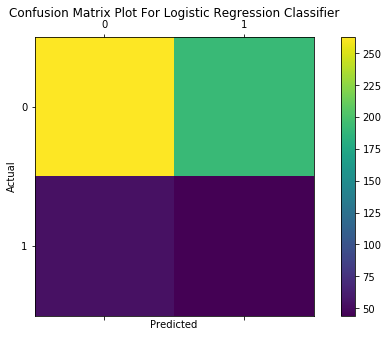

In [72]:
# Nice plot of confusion matrix
# Adjust size of confusion matrix by following code taken from StackOverflow
# https://stackoverflow.com/questions/43021762/matplotlib-how-to-change-figsize-for-matshow
plt.figure(figsize=(10,5))
plt.matshow(cm, fignum=1)

plt.title('Confusion Matrix Plot For Logistic Regression Classifier')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [73]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier().fit(X_train,y_train)

# print MLP score
print("Score: {:.2f}".format(mlp.score(X_test, y_test)))

Score: 0.82


/Users/scottlew/miniconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [74]:
# Generate Confusion Matrix for Neural Network
actual = y_test
predictions = mlp.predict(X_test)
#results = confusion_matrix(actual, predictions) 
#print(predictions)
print()
cm = confusion_matrix(actual,predictions)
print(cm)


[[455   0]
 [ 98   0]]


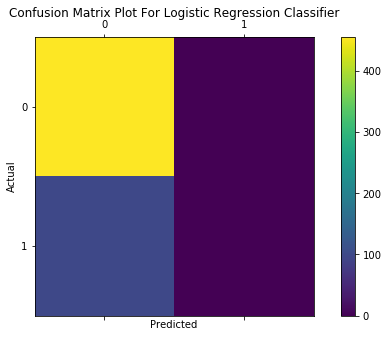

In [75]:
# Nice plot of confusion matrix
# Adjust size of confusion matrix by following code taken from StackOverflow
# https://stackoverflow.com/questions/43021762/matplotlib-how-to-change-figsize-for-matshow
plt.figure(figsize=(10,5))
plt.matshow(cm, fignum=1)

plt.title('Confusion Matrix Plot For Logistic Regression Classifier')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [76]:
# try another neural network with 3 hidden layers
mlp2 = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=500).fit(X_train,y_train)
# print MLP score
print("Score: {:.2f}".format(mlp2.score(X_test, y_test)))

Score: 0.18


In [77]:
# Generate Confusion Matrix for Neural Network
actual = y_test
predictions = mlp2.predict(X_test)
#results = confusion_matrix(actual, predictions) 
#print(predictions)
print()
cm = confusion_matrix(actual,predictions)
print(cm)


[[  0 455]
 [  0  98]]
